In [58]:
!(cat data.csv | sed -e 's/","/#/g' -e 's/,"/#/g' -e 's/",/#/g' | cut -d'#' -f3 | tr '[:upper:]' '[:lower:]'| tr ' ,;:.="|-' '\n' | sort | uniq -c | sort -rn | less)

1035122 =
 117685 zalando
  88888 de
  69900 in
  57144 und
  52460 en
  49387 mit
  33407 die
  31972 von
  30511 bei
  30147 der
  29547 bestellen!
  29479 a
  27501 con
  27155 la
  26442 material
  26094 at
  25888 and
  23529 cm
  22695 fr<C3><A5>n
  21965 sur
  21769 jetzt
  21326 versandkostenfrei
:

In [59]:
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w de | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w die | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w ein | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w eine | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w und | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w oder | wc -l)

42222
20503
9954
7096
31313
3265


In [83]:
# !(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w en | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w the | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w a | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w an | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w and | wc -l)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w or | wc -l)

10063
18245
7755
13461
1421


In [67]:
!(head data.csv > header.txt)
!(cat data.csv | tr '[:upper:]' '[:lower:]' | grep -w de > tmp.csv)
!(cat header.txt tmp.csv > data_de.csv)

In [5]:
import pandas as pd
import numpy as np
import pandas_profiling
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer

In [82]:
df_data = pd.read_csv('data_de.csv')

tag_data = pd.read_csv('label_info.csv')
# Create the set of level 2 tags
l2_tags = set(tag_data[tag_data['level'] == 2]['name'])

y = df_data['labels'].apply(lambda x: x.split(','))  # split the tags in each row
y = y.apply(lambda x: set(x) & l2_tags)  # only select the tags at level 2

df_data['labels'] = df_data['labels'].apply(lambda x: ','.join(sorted(list(x))))
        
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

dic_labels = {i: 'label_{}'.format(c.lower()) for i, c in enumerate(mlb.classes_)}
df_labels = pd.DataFrame(y, columns=list(dic_labels.values()))
print(dic_labels)

df_data = pd.concat([df_data, df_labels], axis=1)
df_data.drop(['labels'], 1 , inplace=True)

df_data.head()

{0: 'label_anzüge', 1: 'label_hemden', 2: 'label_hosen', 3: 'label_shirts', 4: 'label_wäsche'}


,id,name,description,price,shop,brand,label_anzüge,label_hemden,label_hosen,label_shirts,label_wäsche
0,8716,Herren Smokinghemd Haikragen weiss Langarm tai...,Modisches Hemd bei Herrenausstatter: Elegantes...,84.949997,Herrenausstatter,Herrenausstatter.de,0,1,0,0,0
1,9052,Herren Jockey Midway Brief weiss unifarben,Jockeys feinste Baumwollqualität in modernem D...,24.950001,Herrenausstatter,Jockey,0,0,1,0,1
2,9057,Herren Jockey T-Shirt weiss unifarben,T-Shirt von Jockey. Die Besonderheit bei Luxur...,24.950001,Herrenausstatter,Jockey,0,0,0,1,1
3,9395,Herren Jockey Jerseyhemd hellblau Langarm Kent...,Modisches Hemd bei Herrenausstatter: Hemd im B...,39.950001,Herrenausstatter,Jockey,0,1,0,0,0
4,9611,Herren HOM V-Shirt Hilary schwarz unifarben,Schlichtes T-Shirt von HOM Form: T-Shirt mit V...,19.950001,Herrenausstatter,HOM,0,0,0,1,1


In [77]:
df_data = pd.read_csv('data.csv')

tag_data = pd.read_csv('label_info.csv')
# Create the set of level 2 tags
l2_tags = set(tag_data[tag_data['level'] == 2]['name'])

y = df_data['labels'].apply(lambda x: x.split(','))  # split the tags in each row
y = y.apply(lambda x: set(x) & l2_tags)  # only select the tags at level 2

df_data['labels'] = df_data['labels'].apply(lambda x: ','.join(sorted(list(x))))
        
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

dic_labels = {i: 'label_{}'.format(c.lower()) for i, c in enumerate(mlb.classes_)}
df_labels = pd.DataFrame(y, columns=list(dic_labels.values()))
print(dic_labels)

df_data = pd.concat([df_data, df_labels], axis=1)
df_data.drop(['labels'], 1 , inplace=True)

df_data.head()

{0: 'label_anzüge', 1: 'label_bademode', 2: 'label_ballerinas', 3: 'label_blusen', 4: 'label_boleros', 5: 'label_bootsschuhe', 6: 'label_caps', 7: 'label_fliegen', 8: 'label_geldbeutel', 9: 'label_gürtel', 10: 'label_halbschuhe', 11: 'label_handschuhe', 12: 'label_hausschuhe', 13: 'label_hemden', 14: 'label_high heels', 15: 'label_homewear', 16: 'label_hosen', 17: 'label_hüte', 18: 'label_jacken', 19: 'label_jeans', 20: 'label_kleider', 21: 'label_kopfhörer', 22: 'label_kostüme', 23: 'label_krawatten', 24: 'label_lackschuhe', 25: 'label_lederschuhe', 26: 'label_manschettenknöpfe', 27: 'label_mäntel', 28: 'label_mützen', 29: 'label_ohrenwärmer', 30: 'label_overalls', 31: 'label_pantoletten', 32: 'label_plateau schuhe', 33: 'label_pullover', 34: 'label_pumps', 35: 'label_röcke', 36: 'label_sandalen', 37: 'label_sandaletten', 38: 'label_schals', 39: 'label_schmuck', 40: 'label_shirts', 41: 'label_sneaker', 42: 'label_sommerschuhe', 43: 'label_sonnenbrillen', 44: 'label_stiefel', 45: 'labe

,id,name,description,price,shop,brand,label_anzüge,label_bademode,label_ballerinas,label_blusen,...,label_tops,label_trachtenmode,label_trachtenschuhe,label_tücher,label_uhren,label_wedges,label_westen,label_winterschuhe,label_wäsche,label_zehentrenner
0,8716,Herren Smokinghemd Haikragen weiss Langarm tai...,Modisches Hemd bei Herrenausstatter: Elegantes...,84.949997,Herrenausstatter,Herrenausstatter.de,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9052,Herren Jockey Midway Brief weiss unifarben,Jockeys feinste Baumwollqualität in modernem D...,24.950001,Herrenausstatter,Jockey,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9057,Herren Jockey T-Shirt weiss unifarben,T-Shirt von Jockey. Die Besonderheit bei Luxur...,24.950001,Herrenausstatter,Jockey,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9395,Herren Jockey Jerseyhemd hellblau Langarm Kent...,Modisches Hemd bei Herrenausstatter: Hemd im B...,39.950001,Herrenausstatter,Jockey,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9611,Herren HOM V-Shirt Hilary schwarz unifarben,Schlichtes T-Shirt von HOM Form: T-Shirt mit V...,19.950001,Herrenausstatter,HOM,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [74]:
pandas_profiling.ProfileReport(df_data)

Number of variables,66
Number of observations,200000
Total Missing (%),0.0%
Total size in memory,100.7 MiB
Average record size in memory,528.0 B
Numeric,2
Categorical,4
Boolean,59
Date,0
Text (Unique),0
Rejected,1


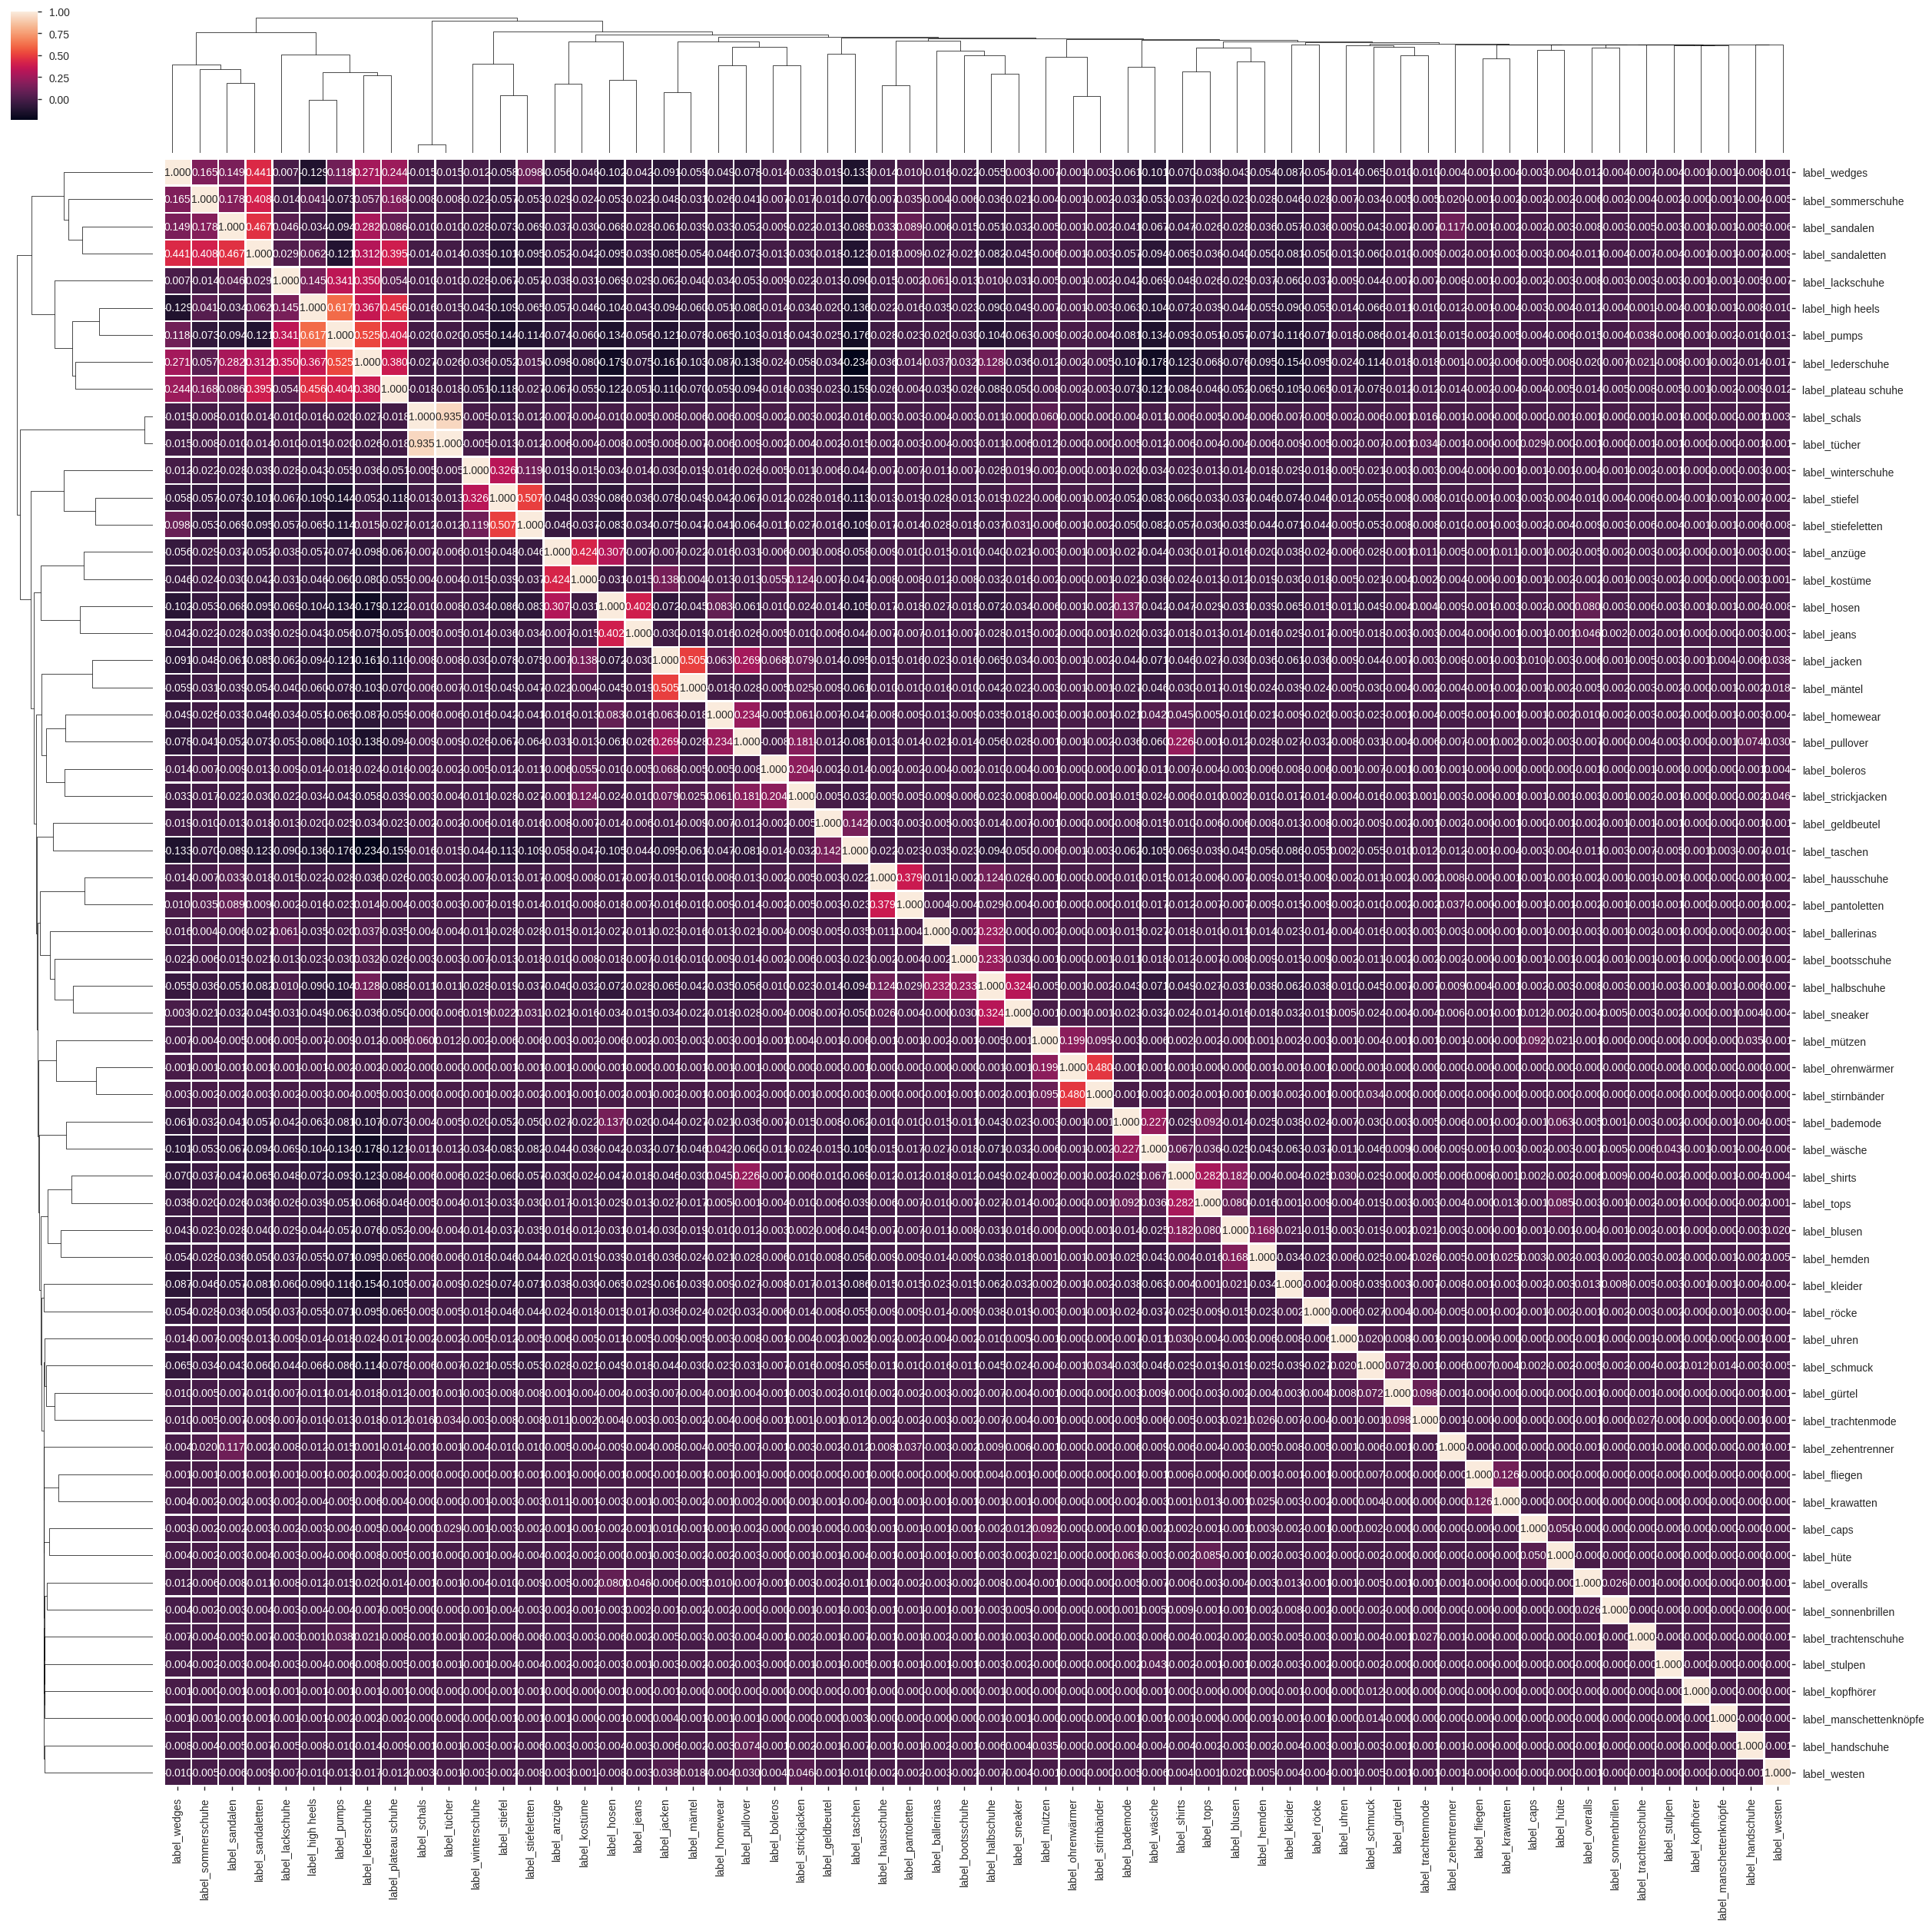

In [78]:
g = sns.clustermap(df_labels.corr(), linewidths=1, square=True, annot=True, fmt=".3f", figsize = (30, 30))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0); 

cluster: 0, id: 55, label: label_wedges
cluster: 0, id: 42, label: label_sommerschuhe
cluster: 0, id: 36, label: label_sandalen
cluster: 0, id: 37, label: label_sandaletten
cluster: 0, id: 31, label: label_pantoletten
cluster: 0, id: 59, label: label_zehentrenner
cluster: 1, id: 0, label: label_anzüge
cluster: 1, id: 22, label: label_kostüme
cluster: 1, id: 16, label: label_hosen
cluster: 1, id: 20, label: label_kleider
cluster: 2, id: 2, label: label_ballerinas
cluster: 2, id: 5, label: label_bootsschuhe
cluster: 2, id: 10, label: label_halbschuhe
cluster: 2, id: 41, label: label_sneaker
cluster: 3, id: 40, label: label_shirts
cluster: 3, id: 50, label: label_tops
cluster: 3, id: 3, label: label_blusen
cluster: 3, id: 13, label: label_hemden
cluster: 4, id: 15, label: label_homewear
cluster: 4, id: 33, label: label_pullover
cluster: 4, id: 4, label: label_boleros
cluster: 4, id: 47, label: label_strickjacken
cluster: 5, id: 17, label: label_hüte
cluster: 5, id: 6, label: label_caps
cl

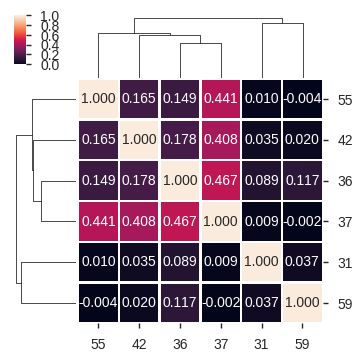

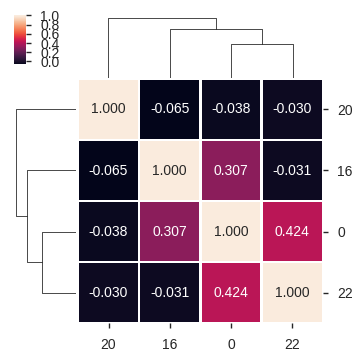

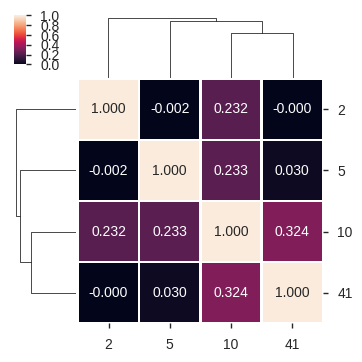

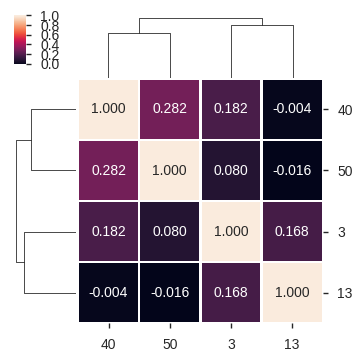

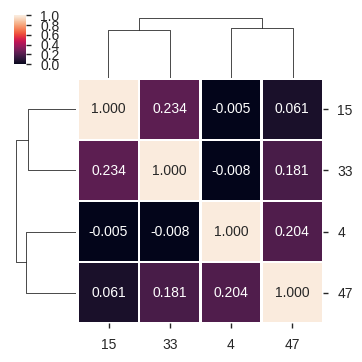

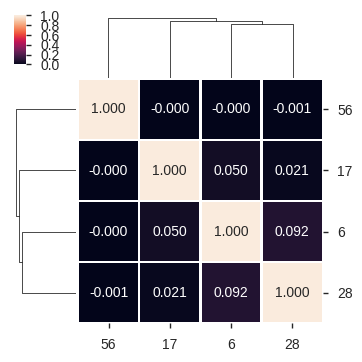

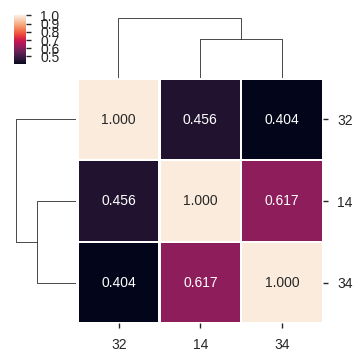

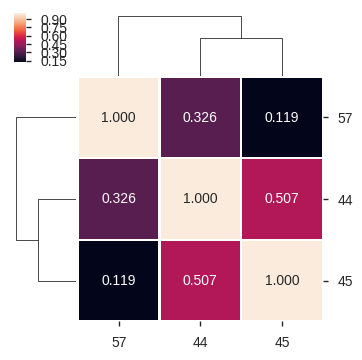

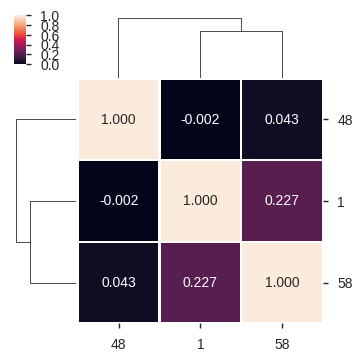

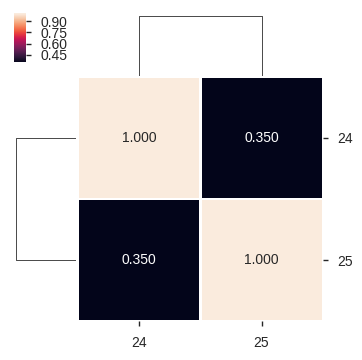

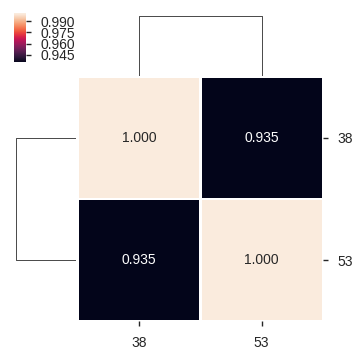

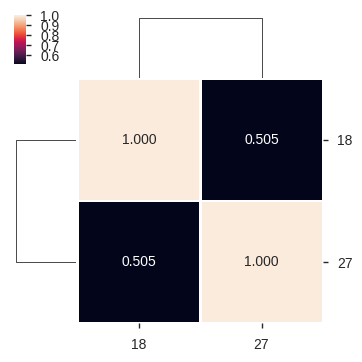

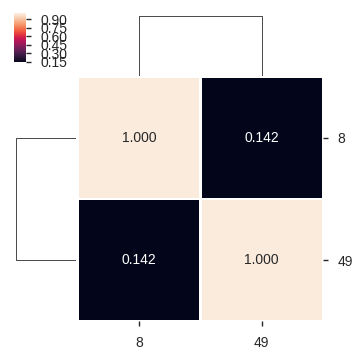

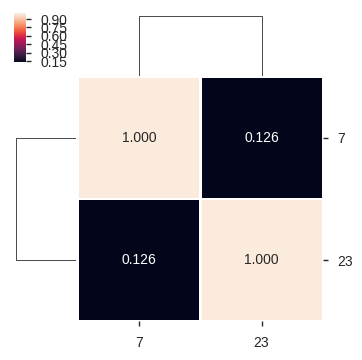

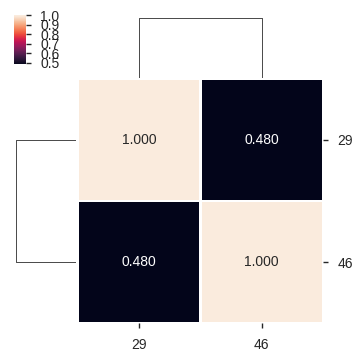

In [80]:
df_labels.columns = list(dic_labels)

clusters = [[55, 42, 36, 37, 31, 59],
            [0, 22, 16, 20], 
            [2, 5, 10, 41],
             [40, 50, 3, 13], 
            [15, 33, 4, 47], 
            [17, 6, 28, 56],
             [32, 14, 34], 
            [57, 44, 45], 
            [48, 1, 58], 
            [12],
            [24, 25],
            [38, 53], 
            [18, 27], 
            [8, 49], 
            [7, 23], 
            [29, 46],
             [19],
            [43],[35],[30],[39],[9],[51],[21],[26],[11],[54],[52]]

for i, cluster in enumerate(clusters):
    
    if len(cluster) > 1:
        g = sns.clustermap(df_labels[cluster].corr(), linewidths=1, square=True, annot=True, fmt=".3f", figsize=(4,4))
        plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);
        
    for j in cluster:
        print('cluster: {}, id: {}, label: {}'.format(i, j, dic_labels[j]))

,cluster_id
,count
cluster_id,
10,32898
6,30778
1,25615
13,23889
8,15226
7,14030
2,13698
12,12138


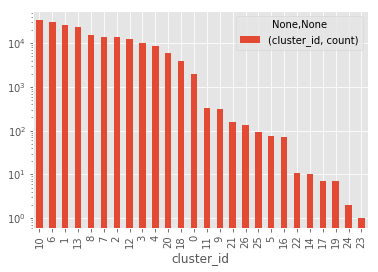

In [26]:
def find_clusters(row):
    for k, v in dic_labels.items():
        if row[k] == 1:
            for i, cluster in enumerate(clusters):
                if k in cluster:
                    return i

    return -1

df_cluster = df_labels.apply(find_clusters, 1).reset_index(drop=True)
df_data['cluster_id'] = df_cluster

df_agg = df_data[['cluster_id']].groupby(['cluster_id']).aggregate({'cluster_id' : ['count']}).sort_values([('cluster_id', 'count')], ascending=False)
df_agg.plot.bar(logy=True)
display(df_agg)

In [45]:
f_list = df_agg[df_agg[('cluster_id', 'count')] > 100].index.tolist()
df_data[df_data['cluster_id'].apply(lambda x : x in f_list)]

,id,name,description,price,shop,brand,0,1,2,3,...,51,52,53,54,55,56,57,58,59,cluster_id
0,8716,Herren Smokinghemd Haikragen weiss Langarm tai...,Modisches Hemd bei Herrenausstatter: Elegantes...,84.949997,Herrenausstatter,Herrenausstatter.de,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,9052,Herren Jockey Midway Brief weiss unifarben,Jockeys feinste Baumwollqualität in modernem D...,24.950001,Herrenausstatter,Jockey,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,9057,Herren Jockey T-Shirt weiss unifarben,T-Shirt von Jockey. Die Besonderheit bei Luxur...,24.950001,Herrenausstatter,Jockey,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
3,9395,Herren Jockey Jerseyhemd hellblau Langarm Kent...,Modisches Hemd bei Herrenausstatter: Hemd im B...,39.950001,Herrenausstatter,Jockey,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,9611,Herren HOM V-Shirt Hilary schwarz unifarben,Schlichtes T-Shirt von HOM Form: T-Shirt mit V...,19.950001,Herrenausstatter,HOM,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
5,11662,Herren Hiltl Hose Milano-U lichtgrau,Modische Hose bei Herrenausstatter: Milano U. ...,129.949997,Herrenausstatter,Hiltl,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,11763,Herren Hiltl Hose Milano-U schwarz,Modische Hose bei Herrenausstatter: Milano U. ...,169.949997,Herrenausstatter,Hiltl,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,11764,Herren Hiltl Hose Milano-U anthrazit,Modische Hose bei Herrenausstatter: Milano U. ...,169.949997,Herrenausstatter,Hiltl,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,11765,Herren Hiltl Hose Milano-U graphit,Modische Hose bei Herrenausstatter: Milano U. ...,169.949997,Herrenausstatter,Hiltl,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,11766,Herren Hiltl Hose Milano-U marine,Modische Hose bei Herrenausstatter: Milano U. ...,169.949997,Herrenausstatter,Hiltl,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
